# ANOVA
## 1. Comparando Grupos con Diferentes Métodos de Enseñanza
+ Supongamos que queremos comparar el rendimiento promedio de tres grupos de estudiantes que recibieron diferentes métodos de enseñanza. 
+ Las medias de los grupos son las siguientes:
    + Grupo 1 (Método A): 85, 90, 78
    + Grupo 2 (Método B): 80, 85, 88
    + Grupo 3 (Método C): 92, 88, 95

#### a) Visualización de los datos

C:\Users\Dani\AppData\Local\Temp\ipykernel_33188\2249538368.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo', y='Puntaje', data=df, palette="Set2")
C:\Users\Dani\AppData\Local\Temp\ipykernel_33188\2249538368.py:24: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Grupo', y='Puntaje', data=df, color='black', jitter=True, size=8, marker="o", edgecolor="gray")


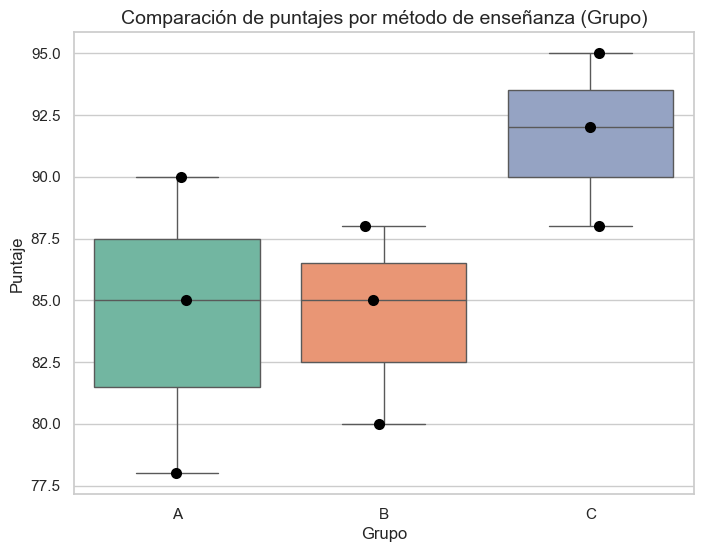

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los datos del ejemplo
data = {
    'Puntaje': [85, 90, 78, 80, 85, 88, 92, 88, 95],
    'Grupo': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de caja (boxplot) con puntos
plt.figure(figsize=(8, 6))

# Gráfico de caja (boxplot)
sns.boxplot(x='Grupo', y='Puntaje', data=df, palette="Set2")

# Añadir puntos individuales de datos para mayor claridad
sns.stripplot(x='Grupo', y='Puntaje', data=df, color='black', jitter=True, size=8, marker="o", edgecolor="gray")

# Añadir título y etiquetas
plt.title('Comparación de puntajes por método de enseñanza (Grupo)', fontsize=14)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Puntaje', fontsize=12)

# Mostrar el gráfico
plt.show()


#### b) Calculos

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

# Datos del ejemplo
data = {
    'Puntaje': [85, 90, 78, 80, 85, 88, 92, 88, 95],
    'Grupo': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']
}

# Crear DataFrame
df = pd.DataFrame(data)

# ANOVA utilizando statsmodels
modelo = ols('Puntaje ~ C(Grupo)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

anova_table


**Interpretación de los resultados**
+ El valor p (PR(>F)) es 0.1639, que es mayor que 0.05. + Esto significa que no hay suficiente evidencia para rechazar la hipótesis nula, 
    + lo que sugiere que no hay diferencias significativas entre las medias de los tres grupos.

#### c) Visualización de los resultados

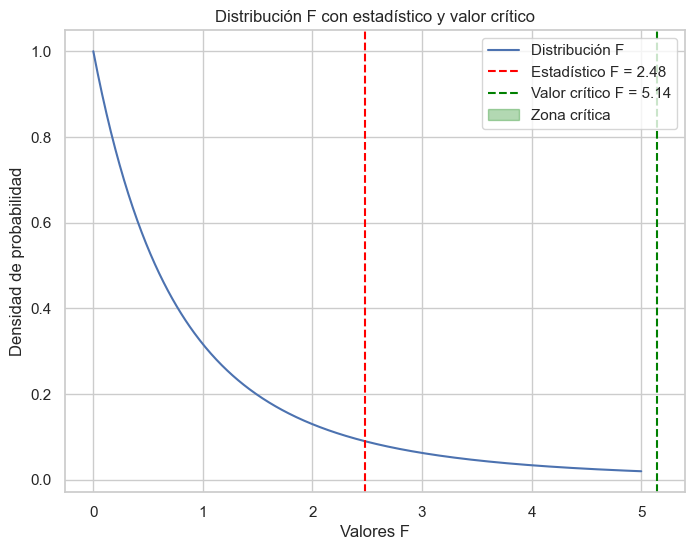

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros del ANOVA
df_between = 2  # Grados de libertad entre los grupos
df_within = 6   # Grados de libertad dentro de los grupos
f_estadistico = 2.48  # Estadístico F obtenido

# Nivel de significancia
alpha = 0.05

# Calcular el valor crítico F
f_critico = stats.f.ppf(1 - alpha, df_between, df_within)

# Crear una serie de valores F para la gráfica
x = np.linspace(0, 5, 500)
y = stats.f.pdf(x, df_between, df_within)

# Crear la gráfica de la distribución F
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='Distribución F')

# Añadir una línea para el estadístico F calculado
plt.axvline(x=f_estadistico, color='red', linestyle='--', label=f'Estadístico F = {f_estadistico:.2f}')

# Añadir una línea para el valor crítico
plt.axvline(x=f_critico, color='green', linestyle='--', label=f'Valor crítico F = {f_critico:.2f}')

# Resaltar la zona crítica (área de rechazo de H0)
plt.fill_between(x, 0, y, where=(x >= f_critico), color='green', alpha=0.3, label='Zona crítica')

# Añadir etiquetas y título
plt.title('Distribución F con estadístico y valor crítico')
plt.xlabel('Valores F')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper right')

# Mostrar la gráfica
plt.show()


________________________________________________________________________________________________________________________________________